In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The ReLU network for approximate squaring

In [2]:
def relu(x):
    return np.maximum(x,0)

def sq_approx(x, Nlayers): # 0 <= x <= 1

    def tooth(x):
        return 2.*relu(x)-4.*relu(x-0.5)+2.*relu(x-1.)
        
    out = 1.*x
    for n in range(Nlayers):
        x = tooth(x)
        out -= 2.**(-2*n-2)*x
    
    Nconnections = 7*Nlayers+1
    return out, Nconnections

### Validation

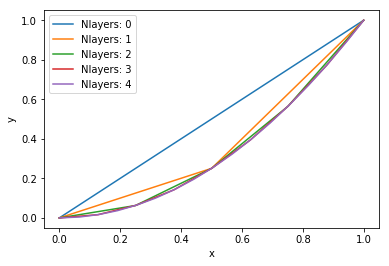

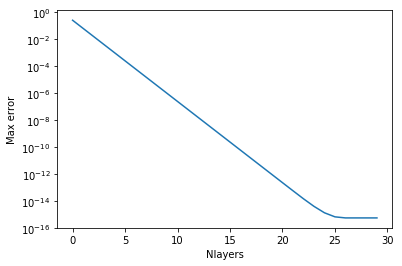

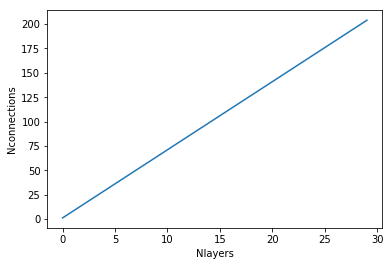

In [3]:
x = np.linspace(0,1,1000)
errL = []
NconnectionsL = []
for Nlayers in range(30):
    res = sq_approx(x, Nlayers=Nlayers)
    errL.append(np.max(np.abs(res[0]-x*x)))
    NconnectionsL.append(res[1])
    if Nlayers < 5:
        plt.plot(x, sq_approx(x, Nlayers=Nlayers)[0], label='Nlayers: '+str(Nlayers))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure()
plt.semilogy(range(30), errL)
plt.xlabel('Nlayers')
plt.ylabel('Max error')

plt.figure()
plt.plot(range(30), NconnectionsL)
plt.xlabel('Nlayers')
plt.ylabel('Nconnections')
plt.show()